In [10]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as spwav
import numpy as np
%matplotlib inline
from IPython.display import display

In [91]:
rate,y = spwav.read("AMajor.wav")
print rate

44100


In [75]:
t = np.linspace(0,len(y)/float(rate),len(y))

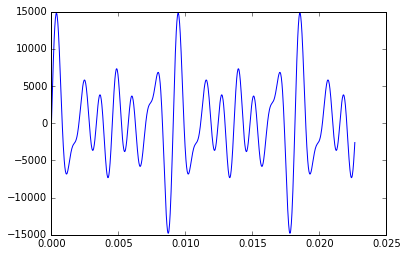

In [19]:
plt.plot(t[0:1000],y[0:1000])

In [93]:
A = np.max(y)
y = A*np.sin(440*2*np.pi*t)
y = np.array(y,dtype = "int16")
spwav.write("A440_good.wav",rate,y)

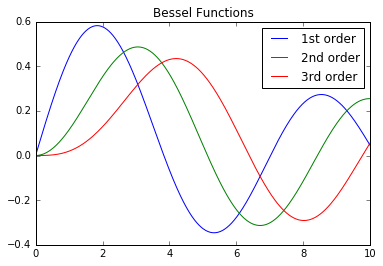

In [28]:
from scipy.special import jn
t = np.linspace(0,10,1000)
plt.plot(t,jn(1,t),t,jn(2,t),t,jn(3,t))
plt.legend(["1st order","2nd order","3rd order"])
plt.title("Bessel Functions")

In [38]:
from scipy import linalg as spla
N = 10
A = np.random.rand(N,N)
b = np.random.rand(N,1)
x = spla.solve(A,b)
print spla.norm(A.dot(x)-b,2)

4.22760332623e-16


In [40]:
x2 = spla.inv(A).dot(b)
np.allclose(x,x2)

True

In [73]:
from time import time
N = 800
m = 10
ti = 0
tf = 0
t1 = []
t2 = []
r = range(m)
for i in r:
    A = np.random.rand(N,N)
    b = np.random.rand(N,1)
    ti = time()
    x = spla.solve(A,b)
    tf = time()
    t1.append(tf - ti)
    ti = time()
    x = spla.inv(A).dot(b)
    tf = time()
    t2.append(tf - ti)
print "Solve:", min(t1), "s"
print "Inv:", min(t2), "s"

Solve: 0.0269570350647 s
Inv: 0.066370010376 s


In [2]:
from scipy import fftpack as spft


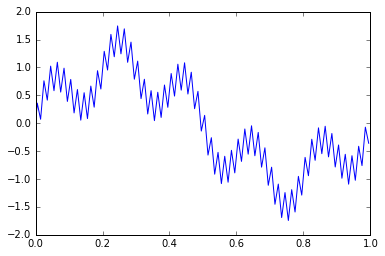

In [108]:
dt = 1./200
t = np.arange(0,1,dt)
a1 = 1
f1 = 1 # Hz
a2 = 0.5
f2 = 5 # Hz
pi = np.pi
a3 = 0.25
f3 = 50
y = a1*np.sin(f1*2 *pi*t)  + a2 * np.sin(f2*2*pi*t) + a3*np.sin(f3*2*pi*t)
plt.plot(t,y)

In [109]:
Y = spft.fft(y)
display(Y) # just a bunch of complex numbers

array([  1.31006317e-14 +0.00000000e+00j,
        -7.04800430e-15 -1.00000000e+02j,
         7.39945318e-15 +1.35792079e-14j,
        -2.54452419e-14 -1.04297246e-15j,
         1.82627203e-14 -1.63441144e-14j,
         6.99148392e-15 -5.00000000e+01j,
        -2.59202859e-14 +2.13913040e-14j,
        -8.88457887e-15 -6.07826898e-15j,
        -1.42228096e-14 -1.74704949e-14j,
        -2.65966070e-15 -6.50537408e-15j,
         1.55868388e-14 -2.19779781e-14j,
         2.13108493e-14 +1.35992423e-14j,
        -1.06604549e-14 -8.41314101e-16j,
         5.60152517e-15 +2.42590057e-14j,
        -7.32751940e-15 +5.29417006e-15j,
        -1.18851853e-14 +4.52207198e-15j,
        -7.89344101e-15 -1.01684705e-14j,
        -1.59239748e-14 +8.11071153e-15j,
        -3.76908689e-15 +3.69417412e-15j,
        -3.00630805e-14 +2.59857718e-15j,
         4.88366103e-15 -1.01746265e-14j,
         3.80730606e-15 -3.94650024e-17j,
        -2.32958213e-14 -1.04058799e-14j,
        -6.96627602e-15 -1.0983903

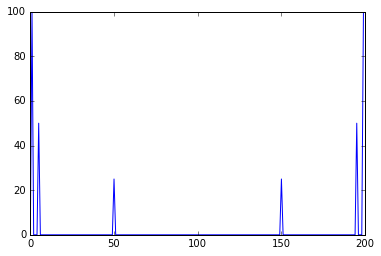

In [110]:
power = abs(Y)  # We're only interested in the magnitudes
plt.plot(power) # This plot uses the integer indices on the X axis. We want frequencies that these powers correspond with.

In [111]:
all([power[i] == power[-i] for i in range(len(power)/2)]) # symmetric

True

In [112]:
N = len(power)
dt = t[1]-t[0]
fs = spft.fftfreq(N,dt)

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99., -100.,  -99.,  -98.,  -97.,  -96.,  -95.,  -94.,  -93.,
        -92.,  -91.,  -90.,  -89.,  -88.,  -87.,  -86.,  -85.,  -84.,
        -83.,  -82.,  -81.,  -80.,  -79.,  -78.,  -77.,  -76.,  -75.,
        -74.,  -73.,

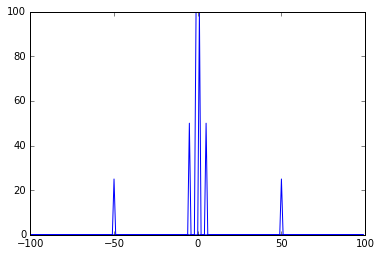

In [113]:
plt.plot(fs,power)
display(fs) # they're in a funny order; 0 - max then -max back to 0

In [114]:
1/(N*dt) # frequencies are just multiples of the sampling frequency

1.0

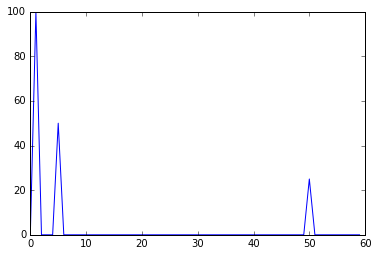

In [115]:
plt.plot(fs[:60],power[:60])